In [1]:
from fenics import *
from mshr import *
from dolfin import *
import matplotlib.pyplot as plt
from ISHE_constants_Bi2Se3_variable import *

In [2]:
import fenics

In [3]:
set_log_level(20)

In [4]:
width = 100.0
height = 5.0

In [5]:
# Read mesh from file
rectangle = Rectangle(Point(0, 0), Point(100.0, 5.0))
mesh = generate_mesh(rectangle, 500)
# mesh = UnitSquareMesh(50, 50)

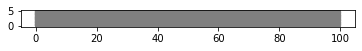

In [6]:
plot(mesh)

In [7]:
# Define function space for system of concentrations
P1 = FiniteElement("P", triangle, 1)
element = MixedElement([P1, P1, P1])
V_space = FunctionSpace(mesh, element)

In [8]:
# Define test functions
v_1, v_2, v_3 = TestFunctions(V_space)

In [9]:
# Define functions for f amd g
u = Function(V_space)

# Split system functions to access components
n, p, V = split(u)
# f, g, h = split(u)

In [10]:
f = Expression("A*sin(x[0]) + B*cos(x[1])", A=2.0, B=Constant(4.0))


KeyError: 'Must supply element or degree'

In [35]:
bc_n_left_expr = Expression("n_i * exp((Eg0_e/2 - Vbh_l)/kBT_e)", n_i=n_i, Eg0_e=Eg0_e, Vbh_l=Vbh_l, kBT_e=kBT_e, degree=0)

Compilation failed! Sources, command, and errors have been written to: /Users/edwardtang/Project/Physics_Simulation/ISHE/jitfailure-dolfin_expression_27727092dea5451ec1cc048a09fd904c


RuntimeError: Unable to compile C++ code with dijitso

In [28]:
# Define boundaries
right   = f'near(x[0], {height})'
left    = 'near(x[0], 0.0)'

# Define boundary conditions
"""
Boundary Conditions For n
"""
# bc_n_left  = n_i * exp((Eg0_e/2 - Vbh_l)/kBT_e)
# bc_n_right = n_i * exp((Eg0_e/2 - Vbh_r)/kBT_e)


bc_n_left_expr = Expression("n_i * exp((Eg0_e/2 - Vbh_l)/kBT_e)",
                                   n_i=n_i, Eg0_e=Eg0_e, Vbh_l=Vbh_l, kBT_e=kBT_e,
                                   degree=0)
bc_n_right_expr = Expression("n_i * exp((Eg0_e/2 - Vbh_r)/kBT_e)", \
                                   n_i=n_i, Eg0_e=Eg0_e, Vbh_r=Vbh_r, kBT_e=kBT_e, \
                                   degree=0)
bc_n_left   = DirichletBC(V_space.sub(0), bc_n_left_expr, left)
bc_n_right  = DirichletBC(V_space.sub(0), bc_n_right_expr, right)


"""
Boundary Conditions For p
"""
# bc_p_left  = n_i * exp(-(Eg0_e/2 - Vbh_r) / kBT_e)
# bc_p_right = n_i * exp(-(Eg0_e/2 - Vbh_l) / kBT_e)
bc_p_left_expr = Expression("n_i * exp(-(Eg0_e/2 - Vbh_l)/kBT_e)", \
                                   n_i=n_i, Eg0_e=Eg0_e, Vbh_l=Vbh_l, kBT_e=kBT_e, \
                                   degree=0)

bc_p_right_expr = Expression("n_i * exp(-(Eg0_e/2 - Vbh_r)/kBT_e)", \
                                   n_i=n_i, Eg0_e=Eg0_e, Vbh_r=Vbh_r, kBT_e=kBT_e, \
                                   degree=0)
bc_p_left   = DirichletBC(V_space.sub(1), bc_p_left_expr, left)
bc_p_right  = DirichletBC(V_space.sub(1), bc_p_right_expr, right)


"""
Boundary Conditions For V
"""
# bc_V_left  = -Vbh_l + V_SD
# bc_V_right = -Vbh_r
bc_V_left_expr  = Expression("-Vbh_l + V_SD", Vbh_l=Vbh_l, V_SD=V_SD, degree=0)
bc_V_right_expr = Expression("-Vbh_r", Vbh_r=Vbh_r, degree=0)

bc_V_left  = DirichletBC(V_space.sub(2), bc_V_left_expr, left)
bc_V_right = DirichletBC(V_space.sub(2), bc_V_right_expr, right)


# bc_f = [bc_f_top, bc_f_bottom, bc_f_right, bc_f_left]
# bc_g = [bc_g_top, bc_g_bottom, bc_g_right, bc_g_left]
bc_array = [bc_n_left, bc_n_right, 
            bc_p_left, bc_p_right, 
            bc_V_left, bc_V_right]

Moving new file over differing existing file:
src: /Users/edwardtang/Project/Physics_Simulation/ISHE/jitfailure-dolfin_expression_27727092dea5451ec1cc048a09fd904c/error.log.c6adff6cbacf49eb9e05ae0f13da5b7e
dst: /Users/edwardtang/Project/Physics_Simulation/ISHE/jitfailure-dolfin_expression_27727092dea5451ec1cc048a09fd904c/error.log
backup: /Users/edwardtang/Project/Physics_Simulation/ISHE/jitfailure-dolfin_expression_27727092dea5451ec1cc048a09fd904c/error.log.old
Compilation failed! Sources, command, and errors have been written to: /Users/edwardtang/Project/Physics_Simulation/ISHE/jitfailure-dolfin_expression_27727092dea5451ec1cc048a09fd904c


RuntimeError: Unable to compile C++ code with dijitso

In [ ]:
J_n = Constant(mu_n) * n * -grad(V) + Constant(D_n) * grad(n)
J_p = Constant(mu_p) * p * -grad(V) - Constant(D_p) * grad(p)

In [ ]:
def setGeneration(P_L):
    G0 = (P_L/hv)/(np.sqrt(2*np.pi)*sigma)  # unit: 1/(um*s)
    G = Expression("G0 / Az * exp(-pow((x[0]-x0), 2)/(2*pow(sigma,2)))" +
                   "*exp(-alpha*(1-x[1]))",\
                    G0=G0, Az=Az, x0=x0, sigma=sigma, alpha=alpha, degree=4)
    return G

In [26]:
# G = G0/Az * np.exp(-(x-x0)^2/(2*sigma^2))*exp(-alpha*(1-y))
x0 = 100
G = setGeneration(1e-9)
R = p / Constant(t_p)

In [27]:
# Define variational problem
# F = dot(grad(v_1), grad(f)) * dx + dot(grad(v_2), grad(g)) * dx \
#     + dot(grad(v_3), grad(h)) * dx + v_1 * (g - h* f + s_1) * dx \
#     + v_2 * (f + h + s_2) * dx + v_3 * (f * g + s_3) * dx
n_vec = FacetNormal(mesh)

# F = dot(grad(v_1), J_n) * dx - v_1 * (G - R) * dx + \
#     dot(grad(v_2), J_p) * dx + v_2 * (G - R) * dx + \
#     -v_3 * dot(grad(V), n_vec) * ds + dot(grad(v_3), grad(V)) * dx \
#     - v_3 * Constant(e) * (p - n + Constant(N_D) - Constant(N_A))/ Constant(epsr * eps0) * dx

F = dot(grad(v_1), J_n) * dx - v_1 * (G - R) * dx + \
    dot(grad(v_2), J_p) * dx + v_2 * (G - R) * dx + dot(grad(v_3), grad(V)) * dx \
    - v_3 * Constant(e) * (p - n + Constant(N_D) - Constant(N_A))/ Constant(epsr * eps0) * dx

In [7]:
solve(F==0, u, bc_array, \
      solver_parameters={'linear_solver': 'gmres', 'preconditioner': 'ilu'})

NameError: name 'F' is not defined

TypeError: getter() takes exactly one argument (0 given)

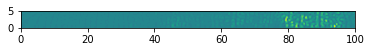

In [17]:
plot(n)

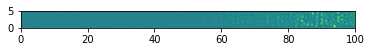

In [18]:
plot(p)

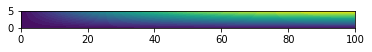

In [19]:
plot(V)

In [26]:
# exact solutions

In [27]:
# f = x^2 * y^2 + x * y
f_exact = Expression("pow(x[0], 2) * pow(x[1], 2) + x[0] * x[1]", degree=4)

# g = x^3 + y^2
g_exact = Expression("pow(x[0], 3) + pow(x[1], 2)", degree=3)

# h = -x^2 + y^3
h_exact = Expression("-pow(x[0], 2) + pow(x[1], 3)", degree=3)

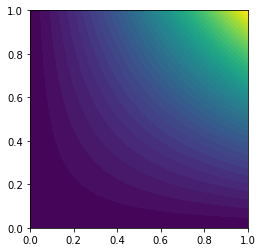

In [28]:
plot(f_exact, mesh = mesh)

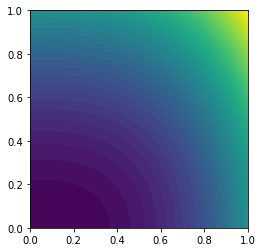

In [29]:
plot(g_exact, mesh = mesh)

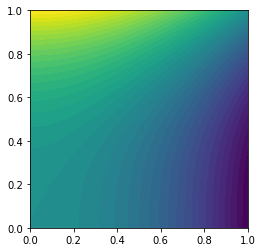

In [30]:
plot(h_exact, mesh = mesh)

In [19]:
vertex_values_f_exact = f_exact.compute_vertex_values(mesh)
vertex_values_g_exact = g_exact.compute_vertex_values(mesh)
vertex_values_f = f.compute_vertex_values(mesh)
vertex_values_g = g.compute_vertex_values(mesh)

error_max_f = np.max(np.abs(vertex_values_f_exact - vertex_values_f))
print("error_max =", error_max_f)
error_max_g = np.max(np.abs(vertex_values_g_exact - vertex_values_g))
print("error_max =", error_max_g)

AttributeError: 'Indexed' object has no attribute 'compute_vertex_values'